<a href="https://colab.research.google.com/github/ese-ada-lovelace-2024/irp-db24/blob/Modeldesigntransformer/SineTransformerVAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## imports
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import math
import copy
import numpy as np
import pandas as pd

In [ ]:
## Import the preprocessed data from INHALE

In [ ]:
preprocessed_data = pd.read_csv('/home/db24/irp-db24/results/processed_merged_dataset.csv')

In [ ]:
preprocessed_data

,Unnamed: 0,br_avg,br_std,act_level,step_count,pm2_5_x,pm2_5_y,pm10,no,no2,...,activity_Sitting bent forwards,activity_Sitting straight/Standing,activity_Undefined,activity_Walking,health_ashmatic,health_healthy,season_Autumn,season_Spring,season_Summer,season_Winter
0,0,3.076146,0.209754,0.042995,0.000000,0.974560,1.000632,1.205971,0.512824,2.628285,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,2.832208,1.781761,0.091346,0.000000,1.078410,1.000632,1.205971,0.512824,2.628285,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,2.880227,2.141613,0.109832,0.000000,1.098612,1.000632,1.205971,0.512824,2.628285,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3,2.775554,1.767832,0.106791,2.079442,1.181727,1.000632,1.205971,0.512824,2.628285,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4,3.311010,0.324131,0.268083,4.276666,1.342865,1.000632,1.205971,0.512824,2.628285,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891404,891404,2.746083,0.673601,0.006096,0.000000,0.792993,2.427454,2.957511,0.000000,2.551006,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
891405,891405,2.831237,1.242047,0.006261,0.000000,0.698135,2.427454,2.957511,0.000000,2.551006,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
891406,891406,2.799052,1.019858,0.008980,0.000000,0.741937,2.427454,2.957511,0.000000,2.551006,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
891407,891407,2.800097,0.726140,0.006749,0.000000,0.802002,2.427454,2.957511,0.000000,2.551006,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
preprocessed_data.columns

## let's filter for the first 3 patients
clean_data_filt = preprocessed_data[(preprocessed_data['patient_id_INH001'] == 1) | (preprocessed_data['patient_id_INH002'] == 1) | (preprocessed_data['patient_id_INH003'] == 1) ].copy()

clean_data = clean_data_filt.drop(columns=['Unnamed: 0','patient_id_INH001', 'patient_id_INH002', 'patient_id_INH003',
       'patient_id_INH004', 'patient_id_INH005', 'patient_id_INH006',
       'patient_id_INH007', 'patient_id_INH008', 'patient_id_INH010',
       'patient_id_INH011', 'patient_id_INH012', 'patient_id_INH013',
       'patient_id_INH014', 'patient_id_INH015', 'patient_id_INH017',
       'patient_id_INH018', 'patient_id_INH020', 'patient_id_INH023',
       'patient_id_INH024', 'patient_id_INH025', 'patient_id_INH027',
       'patient_id_INH028', 'patient_id_INH100', 'patient_id_INH101',
       'patient_id_INH102', 'patient_id_INH103', 'patient_id_INH106',
       'patient_id_INH107', 'patient_id_INH108', 'patient_id_INH109',
       'patient_id_INH110', 'patient_id_INH111', 'patient_id_INH112',
       'patient_id_INH113', 'patient_id_INH114', 'patient_id_INH115',
       'patient_id_INH117', 'patient_id_INH119', 'patient_id_INH120',
       'patient_id_INH121', 'patient_id_INH123', 'patient_id_INH124',
       'patient_id_INH127', 'patient_id_INH128', 'patient_id_INH129',
       'patient_id_INH130', 'patient_id_INH131', 'patient_id_INH132',
       'patient_id_INH135', 'patient_id_INH138', 'patient_id_INH139'])

In [ ]:
clean_data.columns

Index(['br_avg', 'br_std', 'act_level', 'step_count', 'pm2_5_x', 'pm2_5_y',
       'pm10', 'no', 'no2', 'o3', 'so2', 'co', 'age', 'dow_cos', 'dow_sin',
       'hour_cos', 'hour_sin', 'humidity', 'lat_round', 'latitude_x',
       'lon_round', 'longitude_x', 'temperature', 'sex_Female', 'sex_Male',
       'season_x_Summer', 'season_x_Winter', 'activity_Lying down on back',
       'activity_Lying down on front', 'activity_Lying down to the left',
       'activity_Lying down to the right', 'activity_Movement',
       'activity_Sitting bent backwards', 'activity_Sitting bent forwards',
       'activity_Sitting straight/Standing', 'activity_Undefined',
       'activity_Walking', 'health_ashmatic', 'health_healthy',
       'season_Autumn', 'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

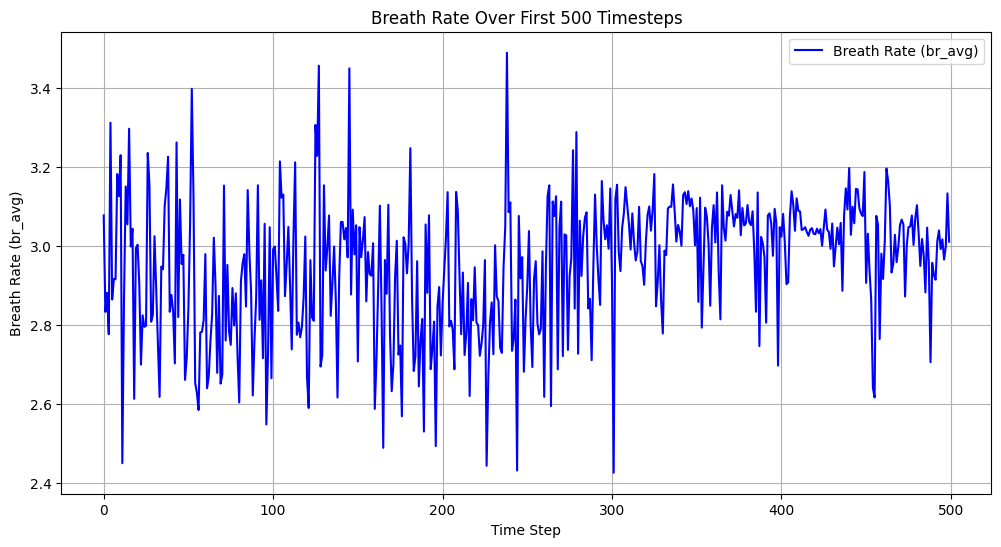

In [ ]:
## USEFUL TO VISUALIZE THE DATA

# import matplotlib.pyplot as plt
# index = 500

# plt.figure(figsize=(12, 6))
# plt.plot(clean_data['br_avg'].iloc[:index], label='Breath Rate (br_avg)', color='blue')
# plt.title('Breath Rate Over First 500 Timesteps')
# plt.xlabel('Time Step')
# plt.ylabel('Breath Rate (br_avg)')
# plt.grid()
# plt.legend()
# plt.show()


In [ ]:
## to do:
# 1. Drop 2 of these lat_round - latitude_x, lon_round, longitude_x
# 2. Is the data preprocessed? If not, we need to preprocess it.
# 3. Check again loss calculation because I believe there is something wrong

## TRANSFORMER VAE

In [ ]:
# === Positional Encoding for continuous features ===
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_length=5000):
        super().__init__()
        pe = torch.zeros(max_seq_length, d_model)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe.unsqueeze(0))

    def forward(self, x):
        seq_len = x.size(1)
        x = x + self.pe[:, :seq_len, :]
        return x

# === Transformer VAE with Dual-Head Decoder ===
class TransformerVAE(nn.Module):
    def __init__(self, feature_dim=4, d_model=64, latent_dim=16, num_heads=4, num_layers=2, dropout=0.1):
        super().__init__()

        self.input_proj = nn.Linear(feature_dim, d_model)
        self.pos_encoder = PositionalEncoding(d_model)

        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=num_heads, dim_feedforward=128, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.fc_mu = nn.Linear(d_model, latent_dim)
        self.fc_logvar = nn.Linear(d_model, latent_dim)

        self.latent_to_hidden = nn.Linear(latent_dim, d_model)

        # Separate decoder layers for reconstruction and forecasting
        decoder_layer_recon = nn.TransformerDecoderLayer(d_model=d_model, nhead=num_heads, dim_feedforward=128, dropout=dropout)
        decoder_layer_forecast = nn.TransformerDecoderLayer(d_model=d_model, nhead=num_heads, dim_feedforward=128, dropout=dropout)

        self.transformer_decoder_recon = nn.TransformerDecoder(decoder_layer_recon, num_layers=num_layers)
        self.transformer_decoder_forecast = nn.TransformerDecoder(decoder_layer_forecast, num_layers=num_layers)

        self.output_proj_recon = nn.Linear(d_model, feature_dim)
        self.output_proj_forecast = nn.Linear(d_model, feature_dim)


    def encode(self, x):
        x = self.input_proj(x)
        x = self.pos_encoder(x)
        x = x.transpose(0, 1)
        encoded = self.transformer_encoder(x)
        pooled = encoded.mean(dim=0)
        mu = self.fc_mu(pooled)
        logvar = self.fc_logvar(pooled)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode_reconstruct(self, z, seq_len, tgt_input):
        hidden = self.latent_to_hidden(z).unsqueeze(0)
        output = self.transformer_decoder_recon(tgt_input, memory=hidden)
        output = self.output_proj_recon(output.transpose(0, 1))
        return output

    def decode_forecast(self, z, forecast_len):
        hidden = self.latent_to_hidden(z).unsqueeze(0)
        tgt_input = torch.zeros(forecast_len, hidden.size(1), hidden.size(2), device=z.device)
        output = self.transformer_decoder_forecast(tgt_input, memory=hidden)
        output = self.output_proj_forecast(output.transpose(0, 1))
        return output

    def forward(self, x, forecast_len=1):
        seq_len = x.size(1)
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)

        x_input = self.input_proj(x)
        x_input = self.pos_encoder(x_input)
        x_input = x_input.transpose(0, 1)

        recon = self.decode_reconstruct(z, seq_len, tgt_input=x_input)
        forecast = self.decode_forecast(z, forecast_len)

        return recon, forecast, mu, logvar

# DATASET AND DATALOADER

In [ ]:
len(clean_data.columns)


43

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

forecast_steps = 1 # Number of steps to forecast
seq_len = 500  # Length of input sequence
num_features = len(clean_data.columns)

# Adjust total timesteps to accommodate forecast target
data_tensor = torch.tensor(clean_data.values, dtype=torch.float32)
print(data_tensor.shape)
total_timesteps = data_tensor.shape[0] - (data_tensor.shape[0] % (seq_len + forecast_steps))
print(total_timesteps)
data_tensor = data_tensor[:total_timesteps]

# Reshape with extended sequence length
sequences = data_tensor.view(-1, seq_len + forecast_steps, num_features)

# Split sequences into input and target
input_seq = sequences[:, :seq_len, :]         # [num_samples, seq_len, num_features]
future_target = sequences[:, seq_len:, :]     # [num_samples, forecast_steps, num_features]

# Train/Val split
split_idx = int(0.8 * len(sequences))
train_dataset = TensorDataset(input_seq[:split_idx], future_target[:split_idx])
val_dataset = TensorDataset(input_seq[split_idx:], future_target[split_idx:])

from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

print(f"Train batches: {len(train_loader)}, Val batches: {len(val_loader)}")


torch.Size([59980, 43])
59619
Train batches: 6, Val batches: 2


## TRAINING THE MODEL 

In [ ]:
vae = TransformerVAE(
    feature_dim=len(clean_data.columns),
    d_model=64,
    latent_dim=64,
    num_heads=6,
    num_layers=6,
    dropout=0.2
)

optimizer = torch.optim.Adam(vae.parameters(), lr=1e-3)
recon_loss_fn = nn.MSELoss()
forecast_loss_fn = nn.MSELoss()
beta = 0.01  # KL divergence weight, tune this as needed

results = []

print(f"Train batches: {len(train_loader)}, Val batches: {len(val_loader)}")

for epoch in range(30):
    vae.train()
    epoch_loss, recon_loss_total, forecast_loss_total, kld_total = 0, 0, 0, 0

    for x, future_target in train_loader:
        
        recon, forecast, mu, logvar = vae(x, forecast_len=1)

        recon_loss = recon_loss_fn(recon, x)
        forecast_loss = forecast_loss_fn(forecast, future_target)
        kld = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())

        loss = recon_loss + forecast_loss + beta * kld

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        recon_loss_total += recon_loss.item()
        forecast_loss_total += forecast_loss.item()
        kld_total += kld.item()

    avg_loss = epoch_loss / len(train_loader)
    avg_recon = recon_loss_total / len(train_loader)
    avg_forecast = forecast_loss_total / len(train_loader)
    avg_kld = kld_total / len(train_loader)

    # 🔥 Validation Phase
    vae.eval()
    val_recon_total, val_forecast_total, val_kld_total = 0, 0, 0

    with torch.no_grad():
        for x_val, future_target_val in val_loader:
            recon_val, forecast_val, mu_val, logvar_val = vae(x_val, forecast_len=1)

            val_recon_loss = recon_loss_fn(recon_val, x_val)
            val_forecast_loss = forecast_loss_fn(forecast_val, future_target_val)
            val_kld = -0.5 * torch.mean(1 + logvar_val - mu_val.pow(2) - logvar_val.exp())

            val_recon_total += val_recon_loss.item()
            val_forecast_total += val_forecast_loss.item()
            val_kld_total += val_kld.item()

    avg_val_recon = val_recon_total / len(val_loader)
    avg_val_forecast = val_forecast_total / len(val_loader)
    avg_val_kld = val_kld_total / len(val_loader)

    print(f"Epoch {epoch+1}: Train Loss {avg_loss:.4f} (Recon {avg_recon:.4f}, Forecast {avg_forecast:.4f}, KLD {avg_kld:.4f}) | Val (Recon {avg_val_recon:.4f}, Forecast {avg_val_forecast:.4f}, KLD {avg_val_kld:.4f})")

    results.append({
        "epoch": epoch + 1,
        "train_loss": avg_loss,
        "train_recon_loss": avg_recon,
        "train_forecast_loss": avg_forecast,
        "train_kld_loss": avg_kld,
        "val_recon_loss": avg_val_recon,
        "val_forecast_loss": avg_val_forecast,
        "val_kld_loss": avg_val_kld
    })

# Save results
import pandas as pd
results_df = pd.DataFrame(results)
results_df.to_csv("vae_dualdecoder_trainval.csv", index=False)
print("Results saved successfully")


Train batches: 6, Val batches: 2


/home/db24/miniconda3/envs/pers_health/lib/python3.10/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


## RECURSIVE FORECASTING AND NEXT STEPS 



In [ ]:
def recursive_forecast_amplitude(model, x_init, steps=30, amplitude_idx=0):
    """
    Predict multiple future steps recursively using model's forecast head.

    Args:
        model: trained TransformerVAE model
        x_init: [batch_size, seq_len, feature_dim] - starting sequence
        steps: int - future steps to predict
        amplitude_idx: int - index of amplitude feature to extract

    Returns:
        preds: [batch_size, steps] - predicted amplitude values
    """

    model.eval()
    preds = []
    x_curr = x_init.clone().detach()

    with torch.no_grad():
        for _ in range(steps):
            recon, future_pred, _, _ = model(x_curr, forecast_len=1)  # Predict 1 step
            next_feat = future_pred[:, -1, :]  # Next predicted feature vector
            next_amp = next_feat[:, amplitude_idx]

            preds.append(next_amp.unsqueeze(1))
            x_curr = torch.cat([x_curr[:, 1:, :], next_feat.unsqueeze(1)], dim=1)

    preds = torch.cat(preds, dim=1)
    return preds

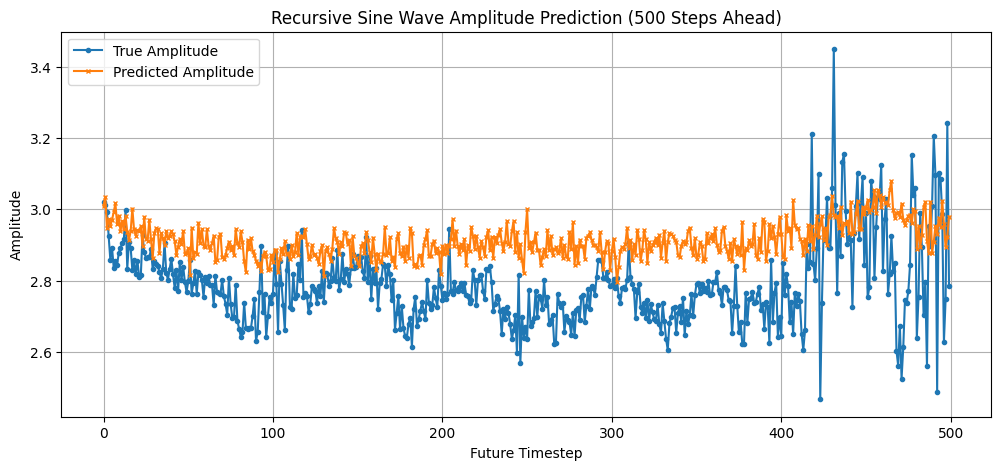

In [ ]:
import matplotlib.pyplot as plt

all = 500

amplitude_idx = clean_data.columns.get_loc('br_avg')  # Adjust this index based on your feature of interest

# Example sequence for context
example_seq = sequences[0].unsqueeze(0)  # [1, seq_len, feature_dim]

# True future amplitude for comparison
true_amplitude = data_tensor[seq_len : seq_len + all, amplitude_idx]

# Predict recursively
predicted_amplitude = recursive_forecast_amplitude(vae, example_seq, steps=all, amplitude_idx=amplitude_idx)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(range(all), true_amplitude.cpu(), label='True Amplitude', marker='o', markersize=3)
plt.plot(range(all), predicted_amplitude.squeeze(0).cpu(), label='Predicted Amplitude', marker='x', markersize=3)
plt.title(f"Recursive Sine Wave Amplitude Prediction ({all} Steps Ahead)")
plt.xlabel("Future Timestep")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

## MODEL KEY PARAMETERS AND RESULTS

#

# Test 1

vae = TransformerVAE(
    feature_dim=len(clean_data.columns),
    d_model=64,
    latent_dim=64,
    num_heads=4,
    num_layers=4, # this is what it was --> num_layers=4,
    dropout=0.3 # this is what it was --> dropout=0.1
)

RESULTS

Train batches: 6, Val batches: 2
Epoch 1: Train Loss 3.6648 (Recon 1.7641, Forecast 1.9006 | Val (Recon 0.9393, Forecast 1.0123)
Epoch 2: Train Loss 2.1266 (Recon 1.0240, Forecast 1.1026 | Val (Recon 0.6533, Forecast 0.6775)
Epoch 3: Train Loss 1.6026 (Recon 0.7809, Forecast 0.8217 | Val (Recon 0.5105, Forecast 0.5160)
Epoch 4: Train Loss 1.3135 (Recon 0.6410, Forecast 0.6725 | Val (Recon 0.4233, Forecast 0.4421)
Epoch 5: Train Loss 1.1273 (Recon 0.5440, Forecast 0.5833 | Val (Recon 0.3802, Forecast 0.3918)
Epoch 6: Train Loss 1.0028 (Recon 0.4843, Forecast 0.5185 | Val (Recon 0.3567, Forecast 0.3744)
Epoch 7: Train Loss 0.9370 (Recon 0.4440, Forecast 0.4930 | Val (Recon 0.3364, Forecast 0.3564)
Epoch 8: Train Loss 0.8704 (Recon 0.4131, Forecast 0.4573 | Val (Recon 0.3098, Forecast 0.3456)
Epoch 9: Train Loss 0.8376 (Recon 0.3926, Forecast 0.4450 | Val (Recon 0.3152, Forecast 0.3377)
Epoch 10: Train Loss 0.8011 (Recon 0.3777, Forecast 0.4234 | Val (Recon 0.3154, Forecast 0.3307)
Epoch 11: Train Loss 0.7756 (Recon 0.3695, Forecast 0.4061 | Val (Recon 0.3221, Forecast 0.3461)
Epoch 12: Train Loss 0.7624 (Recon 0.3599, Forecast 0.4025 | Val (Recon 0.3122, Forecast 0.3383)
Epoch 13: Train Loss 0.7537 (Recon 0.3524, Forecast 0.4013 | Val (Recon 0.3051, Forecast 0.3258)
Epoch 14: Train Loss 0.7271 (Recon 0.3442, Forecast 0.3829 | Val (Recon 0.3093, Forecast 0.3325)
Epoch 15: Train Loss 0.7279 (Recon 0.3400, Forecast 0.3878 | Val (Recon 0.3135, Forecast 0.3213)
Epoch 16: Train Loss 0.7008 (Recon 0.3330, Forecast 0.3678 | Val (Recon 0.3178, Forecast 0.3161)
Epoch 17: Train Loss 0.6900 (Recon 0.3270, Forecast 0.3631 | Val (Recon 0.2966, Forecast 0.3114)
Epoch 18: Train Loss 0.6816 (Recon 0.3237, Forecast 0.3579 | Val (Recon 0.3052, Forecast 0.2959)
Epoch 19: Train Loss 0.6642 (Recon 0.3144, Forecast 0.3498 | Val (Recon 0.3046, Forecast 0.3113)
Epoch 20: Train Loss 0.6690 (Recon 0.3022, Forecast 0.3668 | Val (Recon 0.2907, Forecast 0.2983)
Epoch 21: Train Loss 0.6395 (Recon 0.2947, Forecast 0.3448 | Val (Recon 0.2632, Forecast 0.3223)
Epoch 22: Train Loss 0.6105 (Recon 0.2809, Forecast 0.3296 | Val (Recon 0.2528, Forecast 0.2860)
Epoch 23: Train Loss 0.5907 (Recon 0.2677, Forecast 0.3229 | Val (Recon 0.2364, Forecast 0.2927)
Epoch 24: Train Loss 0.5744 (Recon 0.2521, Forecast 0.3223 | Val (Recon 0.2180, Forecast 0.2964)
Epoch 25: Train Loss 0.5506 (Recon 0.2380, Forecast 0.3126 | Val (Recon 0.2039, Forecast 0.2825)
Epoch 26: Train Loss 0.5395 (Recon 0.2256, Forecast 0.3140 | Val (Recon 0.1886, Forecast 0.2685)
Epoch 27: Train Loss 0.5170 (Recon 0.2137, Forecast 0.3032 | Val (Recon 0.1828, Forecast 0.2778)
Epoch 28: Train Loss 0.4975 (Recon 0.2008, Forecast 0.2967 | Val (Recon 0.1676, Forecast 0.2699)
Epoch 29: Train Loss 0.4749 (Recon 0.1896, Forecast 0.2854 | Val (Recon 0.1613, Forecast 0.2526)
Epoch 30: Train Loss 0.4614 (Recon 0.1804, Forecast 0.2810 | Val (Recon 0.1510, Forecast 0.2573)
Results saved successfully


## Previous loop without KL

vae = TransformerVAE(
    feature_dim=len(clean_data.columns),
    d_model=64,
    latent_dim=64,
    num_heads=4,
    num_layers=4, # this is what it was --> num_layers=4,
    dropout=0.3 # this is what it was --> dropout=0.1
)

optimizer = torch.optim.Adam(vae.parameters(), lr=1e-3)
recon_loss_fn = nn.MSELoss()
forecast_loss_fn = nn.MSELoss()

results = []

print(f"Train batches: {len(train_loader)}, Val batches: {len(val_loader)}")

for epoch in range(30):
    vae.train()
    epoch_loss, recon_loss_total, forecast_loss_total = 0, 0, 0

    for x, future_target in train_loader:

        recon, forecast, mu, logvar = vae(x, forecast_len=1)

        recon_loss = recon_loss_fn(recon, x)
        forecast_loss = forecast_loss_fn(forecast, future_target)
        loss = recon_loss + forecast_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        recon_loss_total += recon_loss.item()
        forecast_loss_total += forecast_loss.item()


    avg_loss = epoch_loss / len(train_loader)
    avg_recon = recon_loss_total / len(train_loader)
    avg_forecast = forecast_loss_total / len(train_loader)


    # 🔥 Validation Phase
    vae.eval()
    val_recon_total, val_forecast_total, val_kld_total = 0, 0, 0

    with torch.no_grad():
        for x_val, future_target_val in val_loader:
            recon_val, forecast_val, mu_val, logvar_val = vae(x_val, forecast_len=1)

            val_recon_loss = recon_loss_fn(recon_val, x_val)
            val_forecast_loss = forecast_loss_fn(forecast_val, future_target_val)
            val_kld = -0.5 * torch.mean(1 + logvar_val - mu_val.pow(2) - logvar_val.exp())

            val_recon_total += val_recon_loss.item()
            val_forecast_total += val_forecast_loss.item()
            val_kld_total += val_kld.item()

    avg_val_recon = val_recon_total / len(val_loader)
    avg_val_forecast = val_forecast_total / len(val_loader)
    avg_val_kld = val_kld_total / len(val_loader)

    print(f"Epoch {epoch+1}: Train Loss {avg_loss:.4f} (Recon {avg_recon:.4f}, Forecast {avg_forecast:.4f} | Val (Recon {avg_val_recon:.4f}, Forecast {avg_val_forecast:.4f})")

    results.append({
        "epoch": epoch + 1,
        "train_loss": avg_loss,
        "train_recon_loss": avg_recon,
        "train_forecast_loss": avg_forecast,
        "val_recon_loss": avg_val_recon,
        "val_forecast_loss": avg_val_forecast,
        "val_kld_loss": avg_val_kld
    })

Save results
import pandas as pd
results_df = pd.DataFrame(results)
results_df.to_csv("vae_dualdecoder_trainval.csv", index=False)
print("Results saved successfully")

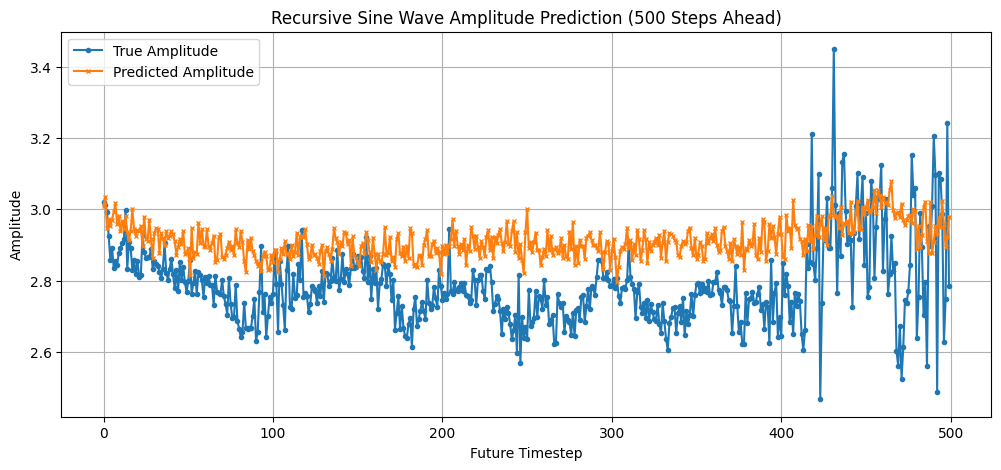

# TEST 2 --> NEW LOOP

vae = TransformerVAE(
    feature_dim=len(clean_data.columns),
    d_model=128,
    latent_dim=128,
    num_heads=8,
    num_layers=6,
    dropout=0.2
)

optimizer = torch.optim.Adam(vae.parameters(), lr=1e-3)
recon_loss_fn = nn.MSELoss()
forecast_loss_fn = nn.MSELoss()
beta = 0.01  # KL divergence weight, tune this as needed

results = []

print(f"Train batches: {len(train_loader)}, Val batches: {len(val_loader)}")

for epoch in range(30):
    vae.train()
    epoch_loss, recon_loss_total, forecast_loss_total, kld_total = 0, 0, 0, 0

    for x, future_target in train_loader:
        
        recon, forecast, mu, logvar = vae(x, forecast_len=1)

        recon_loss = recon_loss_fn(recon, x)
        forecast_loss = forecast_loss_fn(forecast, future_target)
        kld = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())

        loss = recon_loss + forecast_loss + beta * kld

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        recon_loss_total += recon_loss.item()
        forecast_loss_total += forecast_loss.item()
        kld_total += kld.item()

    avg_loss = epoch_loss / len(train_loader)
    avg_recon = recon_loss_total / len(train_loader)
    avg_forecast = forecast_loss_total / len(train_loader)
    avg_kld = kld_total / len(train_loader)

    # 🔥 Validation Phase
    vae.eval()
    val_recon_total, val_forecast_total, val_kld_total = 0, 0, 0

    with torch.no_grad():
        for x_val, future_target_val in val_loader:
            recon_val, forecast_val, mu_val, logvar_val = vae(x_val, forecast_len=1)

            val_recon_loss = recon_loss_fn(recon_val, x_val)
            val_forecast_loss = forecast_loss_fn(forecast_val, future_target_val)
            val_kld = -0.5 * torch.mean(1 + logvar_val - mu_val.pow(2) - logvar_val.exp())

            val_recon_total += val_recon_loss.item()
            val_forecast_total += val_forecast_loss.item()
            val_kld_total += val_kld.item()

    avg_val_recon = val_recon_total / len(val_loader)
    avg_val_forecast = val_forecast_total / len(val_loader)
    avg_val_kld = val_kld_total / len(val_loader)

    print(f"Epoch {epoch+1}: Train Loss {avg_loss:.4f} (Recon {avg_recon:.4f}, Forecast {avg_forecast:.4f}, KLD {avg_kld:.4f}) | Val (Recon {avg_val_recon:.4f}, Forecast {avg_val_forecast:.4f}, KLD {avg_val_kld:.4f})")

    results.append({
        "epoch": epoch + 1,
        "train_loss": avg_loss,
        "train_recon_loss": avg_recon,
        "train_forecast_loss": avg_forecast,
        "train_kld_loss": avg_kld,
        "val_recon_loss": avg_val_recon,
        "val_forecast_loss": avg_val_forecast,
        "val_kld_loss": avg_val_kld
    })

# Save results
import pandas as pd
results_df = pd.DataFrame(results)
results_df.to_csv("vae_dualdecoder_trainval.csv", index=False)
print("Results saved successfully")


# RESULTS